In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
correlation_matrix = df.corr()

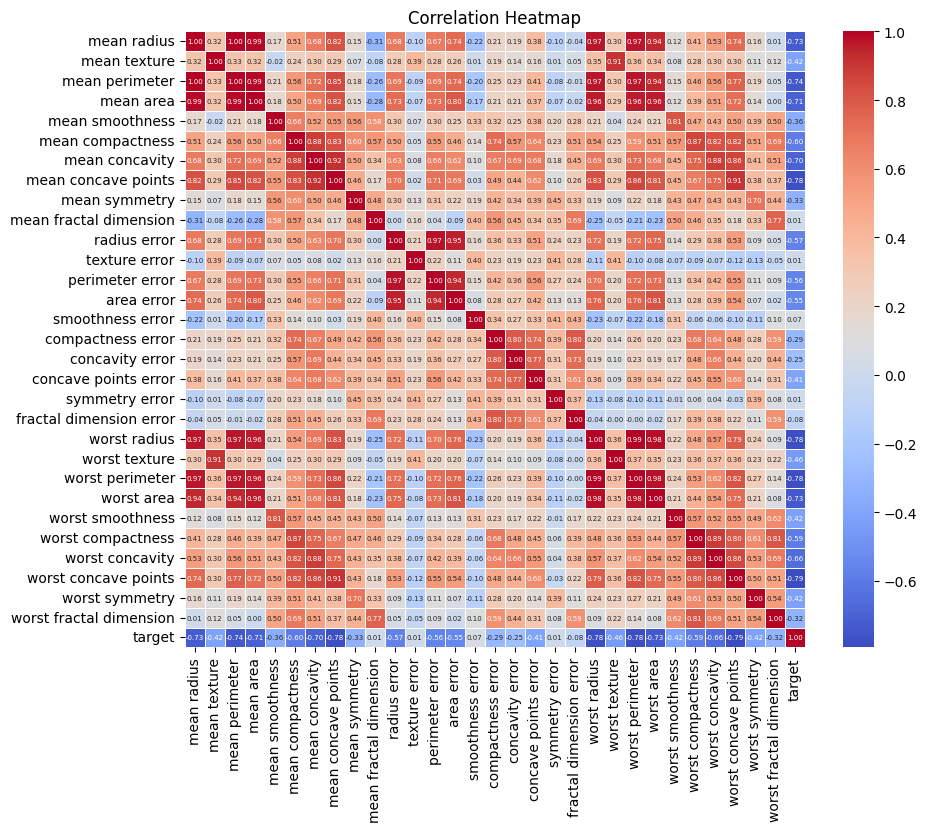

In [6]:
# heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title("Correlation Heatmap")
plt.show()

In [7]:
correlation_matrix["temp"] = abs(correlation_matrix["target"])
corr_sorted = correlation_matrix.sort_values(by=["temp"], ascending=False)
most_corr = corr_sorted.index[corr_sorted["temp"] > 0.5].tolist()

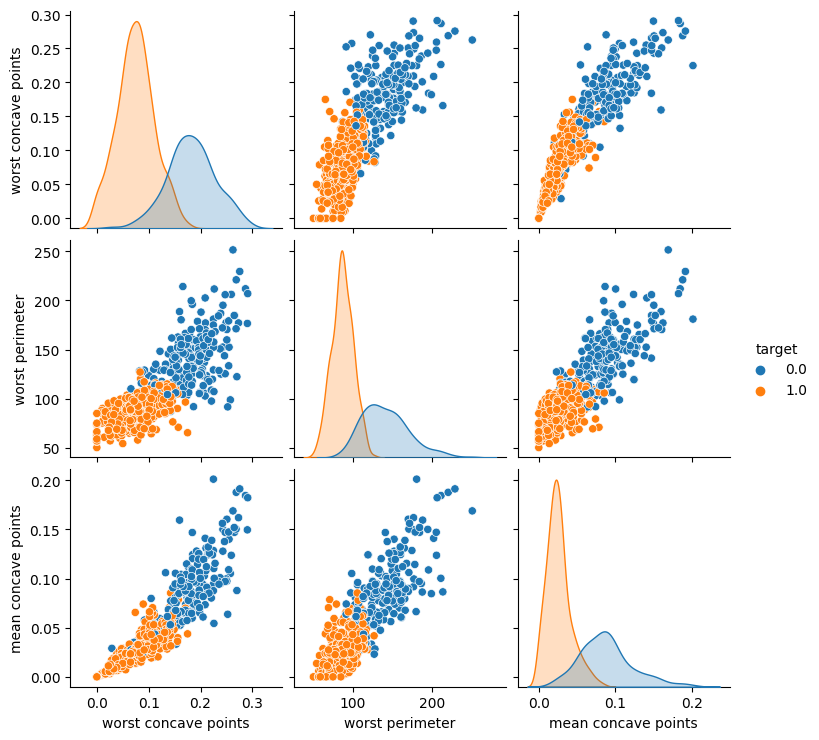

In [8]:
# most correlations
# for column in most_corr:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df[column], df["target"], alpha=0.5)
#     plt.xlabel(column)
#     plt.ylabel("target")
#     plt.title(f"Scatter Plot of {column} vs. target")
#     plt.grid(True)
#     plt.show()
sns.pairplot(df, hue = 'target', vars = most_corr[1:4])
# lmplot = sns.lmplot(x=most_corr[1], y=most_corr[2], data=df, hue='target', fit_reg=True, markers=["o", "x"])

In [9]:
df["target"] = df["target"].astype(int)

<Axes: xlabel='target'>

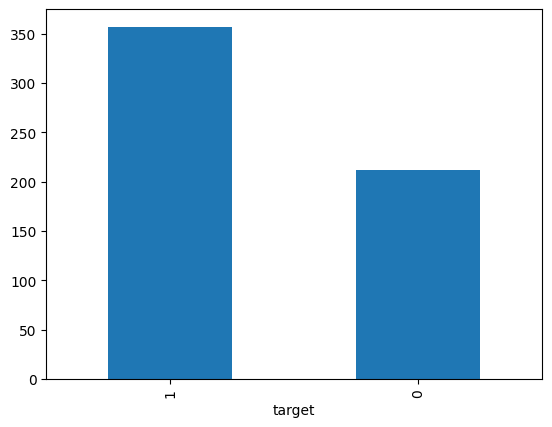

In [10]:
df["target"].value_counts().plot(kind="bar")

In [11]:
X = df.drop(['target'], axis = 1)
y = df["target"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [13]:
from sklearn.svm import SVC
svc_model = SVC()

In [14]:
svc_model.fit(X_train, y_train)

SVC()

In [15]:
y_pred = svc_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.90
Recall: 0.98
F1-Score: 0.94


In [17]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[48  9]
 [ 2 84]]


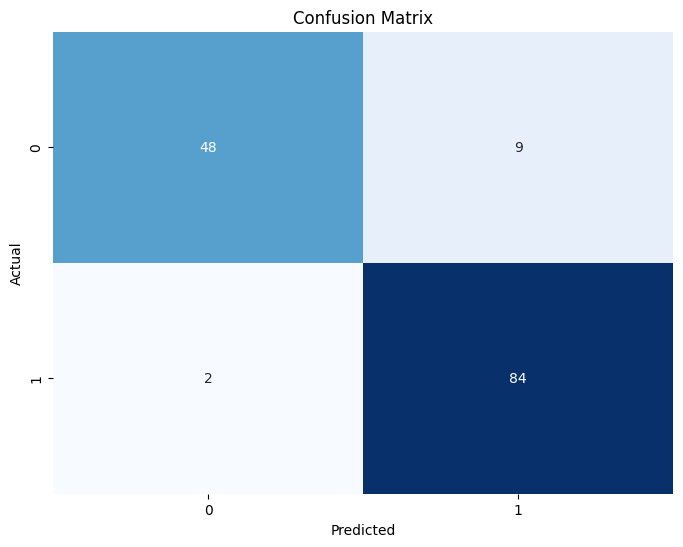

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AUC: 0.91


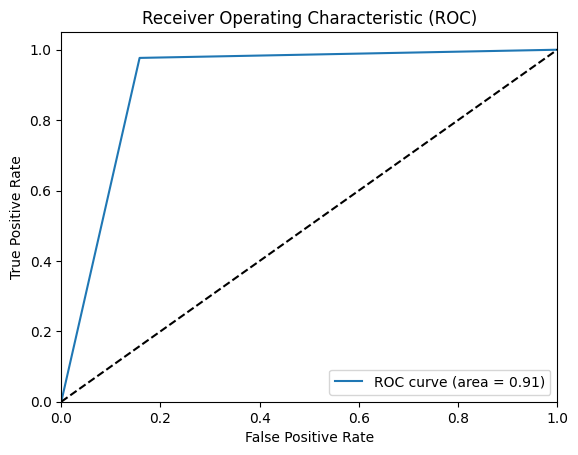

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"AUC: {auc:.2f}")

# Plot ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [20]:
# using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
svc_model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = svc_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# clearly standardization improves accuracy

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98


In [26]:
svc_model.kernel
# by default svc_model used rbf kernel

'rbf'

In [27]:
# trying polynomial kernel
from sklearn.model_selection import cross_val_score
import joblib

degrees = [1, 2, 3, 4, 5]

best_model = None
best_score = -np.inf
degree = 0

for val in degrees:
    model = SVC(kernel='poly', degree=val)
    
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    
    # best model
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        degree = val

# Save the best model to a file
if best_model is not None:
    joblib.dump(best_model, 'best_poly_SVC.pkl')
    print(f"Best SVC Model with Polynomial Kernel - degree: {degree} mean score: {best_score}")



Best SVC Model with Polynomial Kernel - degree: 2 mean score: 0.9121720229777985


In [31]:
best_model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [32]:
y_pred = best_model.predict(X_test)
# get accuracy score, 
get_model_evaluation(y_test, y_pred)
# polynomial kernel is no good for this dataset

Accuracy: 0.78
Precision: 0.76
Recall: 0.94
F1-Score: 0.84


In [33]:
# trying sigmoid
svc_model_sig = SVC(kernel='sigmoid')
svc_model_sig.fit(X_train, y_train)
y_pred = svc_model_sig.predict(X_test)
get_model_evaluation(y_test, y_pred)

Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-Score: 0.98


In [28]:
def get_model_evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")